# COVID-19 data visualizations
This notebook aims to better understand data of the spreading of the novel coronavirus (2019-nCoV) using visualization. 
As of 2/11/2020, the virus is officially named COVID-19 by the World Health Organization. It is a contagious respiratory virus that first started in Wuhan in December 2019. 

Data: https://github.com/CSSEGISandData/COVID-19. Thank you to Johns Hopkins for providing the data!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load timeseries for all countries (and regions). Updated daily.

In [2]:
# Load data from John Hopkins
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
## reshape data
confirmed_df = confirmed_df.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name='confirmed')
deaths_df = deaths_df.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name='deaths')
recoveries_df = recoveries_df.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name='recoveries')

In [4]:
# switch to better date/time format
confirmed_df['date'] = pd.to_datetime(confirmed_df['date'])
deaths_df['date'] = pd.to_datetime(deaths_df['date'])
recoveries_df['date'] = pd.to_datetime(recoveries_df['date'])

In [5]:
# Display per country
confirmed_df.groupby(['Country/Region', 'date']).sum()

Lat     Long  confirmed
Country/Region                 date                                   
Afghanistan                    2020-01-22  33.0000  65.0000          0
                               2020-01-23  33.0000  65.0000          0
                               2020-01-24  33.0000  65.0000          0
                               2020-01-25  33.0000  65.0000          0
                               2020-01-26  33.0000  65.0000          0
                               2020-01-27  33.0000  65.0000          0
                               2020-01-28  33.0000  65.0000          0
                               2020-01-29  33.0000  65.0000          0
                               2020-01-30  33.0000  65.0000          0
                               2020-01-31  33.0000  65.0000          0
                               2020-02-01  33.0000  65.0000          0
                               2020-02-02  33.0000  65.0000          0
                               2020-02-03  33.0000  65.0000          0
                               2020-02-04  33.0000  65.0000          0
                               2020-02-05  33.0000  65.0000          0
                               2020-02-06  33.0000  65.0000          0
                               2020-02-07  33.0000  65.0000          0
                               2020-02-08  33.0000  65.0000          0
                               2020-02-09  33.0000  65.0000          0
                               2020-02-10  33.0000  65.0000          0
                               2020-02-11  33.0000  65.0000          0
                               2020-02-12  33.0000  65.0000          0
                               2020-02-13  33.0000  65.0000          0
                               2020-02-14  33.0000  65.0000          0
                               2020-02-15  33.0000  65.0000          0
                               2020-02-16  33.0000  65.0000          0
                               2020-02-17  33.0000  65.0000          0
                               2020-02-18  33.0000  65.0000          0
                               2020-02-19  33.0000  65.0000          0
                               2020-02-20  33.0000  65.0000          0
...                                            ...      ...        ...
occupied Palestinian territory 2020-02-16  31.9522  35.2332          0
                               2020-02-17  31.9522  35.2332          0
                               2020-02-18  31.9522  35.2332          0
                               2020-02-19  31.9522  35.2332          0
                               2020-02-20  31.9522  35.2332          0
                               2020-02-21  31.9522  35.2332          0
                               2020-02-22  31.9522  35.2332          0
                               2020-02-23  31.9522  35.2332          0
                               2020-02-24  31.9522  35.2332          0
                               2020-02-25  31.9522  35.2332          0
                               2020-02-26  31.9522  35.2332          0
                               2020-02-27  31.9522  35.2332          0
                               2020-02-28  31.9522  35.2332          0
                               2020-02-29  31.9522  35.2332          0
                               2020-03-01  31.9522  35.2332          0
                               2020-03-02  31.9522  35.2332          0
                               2020-03-03  31.9522  35.2332          0
                               2020-03-04  31.9522  35.2332          0
                               2020-03-05  31.9522  35.2332          0
                               2020-03-06  31.9522  35.2332          0
                               2020-03-07  31.9522  35.2332          0
                               2020-03-08  31.9522  35.2332          0
                               2020-03-09  31.9522  35.2332          0
                               2020-03-10  31.9522  35.2332          0


## Select countries with >100 cases OR with >10 deaths

In [6]:
# List of all countries in data
countries = list(set(deaths_df['Country/Region']))

In [7]:
min_confirmed = 100
min_deaths = 10

high_case_countries = []
for country in countries:
    confirmed = confirmed_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['confirmed']
    death = deaths_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['deaths']
    if confirmed >= min_confirmed or death >= min_deaths:
        high_case_countries.append([country, int(confirmed), int(death), int(death)/int(confirmed)])

In [8]:
# Sort by death/cases ratio
df = pd.DataFrame(high_case_countries, columns=['Country', 'infected', 'deaths', 'fatality rate'])
df = df.sort_values(by=['fatality rate']).reset_index(drop=True)
df

,Country,infected,deaths,fatality rate
0,Czechia,298,0,0.000000
1,Qatar,439,0,0.000000
2,Romania,158,0,0.000000
3,Saudi Arabia,118,0,0.000000
4,Estonia,205,0,0.000000
5,Portugal,331,0,0.000000
6,Chile,155,0,0.000000
7,Singapore,243,0,0.000000
8,Brazil,200,0,0.000000
9,Malaysia,566,0,0.000000


# Wild guessing to estimate the fatality rate

 + Here I just do a guess by saying that the fatality rate is $\frac{N_{death}}{N_{infected}}$ with $N_{death}$ the number of deaths and $N_{infected}$ the number of infected people.
 + Since there is no medication that seems to drastically shift the odds, I believe it is OK to assume that the fatality rate should be roughly equal in all regions with decent sanitary conditions. Since many cases seem to only show mild (or no) symptoms the chance of missing actual infected cases is very high. I hence assume that the "true" number of infected is propbably best detected in regions/countries with the lowest fatality rates (of course ignoring countries with low case numbers which make those hard to interpret).
+ Estimate here will be done by the first 8 countries in the above list!

## Estimation risks:
+ Obviously the number of infections is hard to measure correctly for COVID-19. It is more likely to get sever underestimated due to the nature of the disease (many mild cases).
+ The number of fatalities could also be wrong sicne not all deaths will be checked for the virus (especially in older people I expect).
+ The actual numbers will depend a lot on the local age profile.
+ It could still be that the virus acts differently people form different regions or that mutations impact the fatality rate. In those cases my assumption of having roughly ONE fatality rate will not hold anymore.
+ **CAREFULL!** In particular for low number of deaths the error of this type of estimate will of course be huge! 

In [9]:
np.where(df['Country'] == 'Korea, South')[0][0]

25

In [14]:
position_SK = np.where(df['Country'] == 'Korea, South')[0][0]
number_of_deaths = df.iloc[:(position_SK+1),2].sum()
number_of_cases = df.iloc[:(position_SK+1),1].sum()

estimated_rate_optimistic = number_of_deaths/number_of_cases

print("Number of confirmed cases:", number_of_cases)
print("Number of deaths:", number_of_deaths)
print("Fatality rate per infection (optimistic)=", np.round(100*estimated_rate_optimistic, 3), "%" )

Number of confirmed cases: 27647
Number of deaths: 132
Fatality rate per infection (optimistic)= 0.477 %


## Define plotting functions

In [11]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

def square_subplot(ax, cmap, rate_0, cases_confirmed, deaths, title = None):
    plt.style.use('ggplot')
    rate_found = deaths/cases_confirmed
    expected_infection = 1
    if rate_found > 0:
        detected_infections = expected_infection * min(1, rate_0/rate_found)
    else: 
        detected_infections = expected_infection
        
    if rate_0 < rate_found:
        labels = ['Expected infections (' + str(int(cases_confirmed * rate_found/rate_0)) + ')', 
                  'Detected infections (' + str(cases_confirmed) + ')', 
                  'Detected deaths (' + str(deaths) + ')']
    else:
        labels = [' ', 
                  'Detected infections (' + str(cases_confirmed) + ')',  
                  'Detected deaths (' + str(deaths) + ')']
        rate_0 = deaths/cases_confirmed
    
    x = [0, 0, 0]
    y = [0 ,0, 0]
    z = [70, 250, 0]
    a = [0.75, 0.6, 1]
    dx = [expected_infection**0.5, detected_infections**0.5, rate_0**0.5]

    for x, y, c, h, a, label in zip(x, y, z, dx, a, labels):
        ax.add_artist(Rectangle(xy=(x, y),
                      color=cmap(c),        # I did c**2 to get nice colors from your numbers
                      alpha = a,
                      width=h, height=h))      # Gives a square of area h*h

        ax.text((x + 0.02), (h - 0.05), label, fontsize=14, color='white')
    ax.set_title(title, fontsize=18)
    plt.axis('off')
    
def square_plot_array(data, 
                      IDs, 
                      rate_0, 
                      n_x = 2, 
                      main_title=[],
                      filename = None): 
    n_y = int(np.ceil(len(IDs)/n_x))
    
    cmap = plt.cm.hot #magma
    fig = plt.figure(figsize=(6*n_x,6*n_y))

    plt.title(main_title + '\n \n', fontsize=25)
    plt.axis('off')
    for i, ID in enumerate(IDs):
        ax = fig.add_subplot(n_y, n_x, i+1, aspect='equal')
        square_subplot(ax, cmap, rate_0, data.loc[ID]['infected'], data.loc[ID]['deaths'], data.loc[ID]['Country'])
    plt.axis('off')
    if filename is not None:
        plt.savefig(filename)
    plt.show()        
    


# Estimate infections for the countries with highest reported fatality rates
Here I only take countries with >= 10 confirmed deaths due to the virus.
Still, espeically for countries with low counts the following estimated will be highly **ERROR-PRONE**...

In [12]:
min_deaths = 10

high_deaths_countries = []
for country in countries:
    confirmed = confirmed_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['confirmed']
    death = deaths_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['deaths']
    if death >= min_deaths:
        high_deaths_countries.append([country, int(confirmed), int(death), int(death)/int(confirmed)])
        
# Sort by death/cases ratio
data_deaths = pd.DataFrame(high_deaths_countries, columns=['Country', 'infected', 'deaths', 'fatality rate'])
data_deaths = data_deaths.sort_values(by=['fatality rate'], ascending=False).reset_index(drop=True)
data_deaths

,Country,infected,deaths,fatality rate
0,Philippines,142,12,0.084507
1,Iraq,124,10,0.080645
2,Italy,27980,2158,0.077127
3,Iran,14991,853,0.056901
4,China,81033,3217,0.039700
5,United Kingdom,1551,56,0.036106
6,Spain,9942,342,0.034400
7,Japan,839,27,0.032181
8,France,6650,148,0.022256
9,US,4632,85,0.018351


# Plot based on above estimation of fatality rate

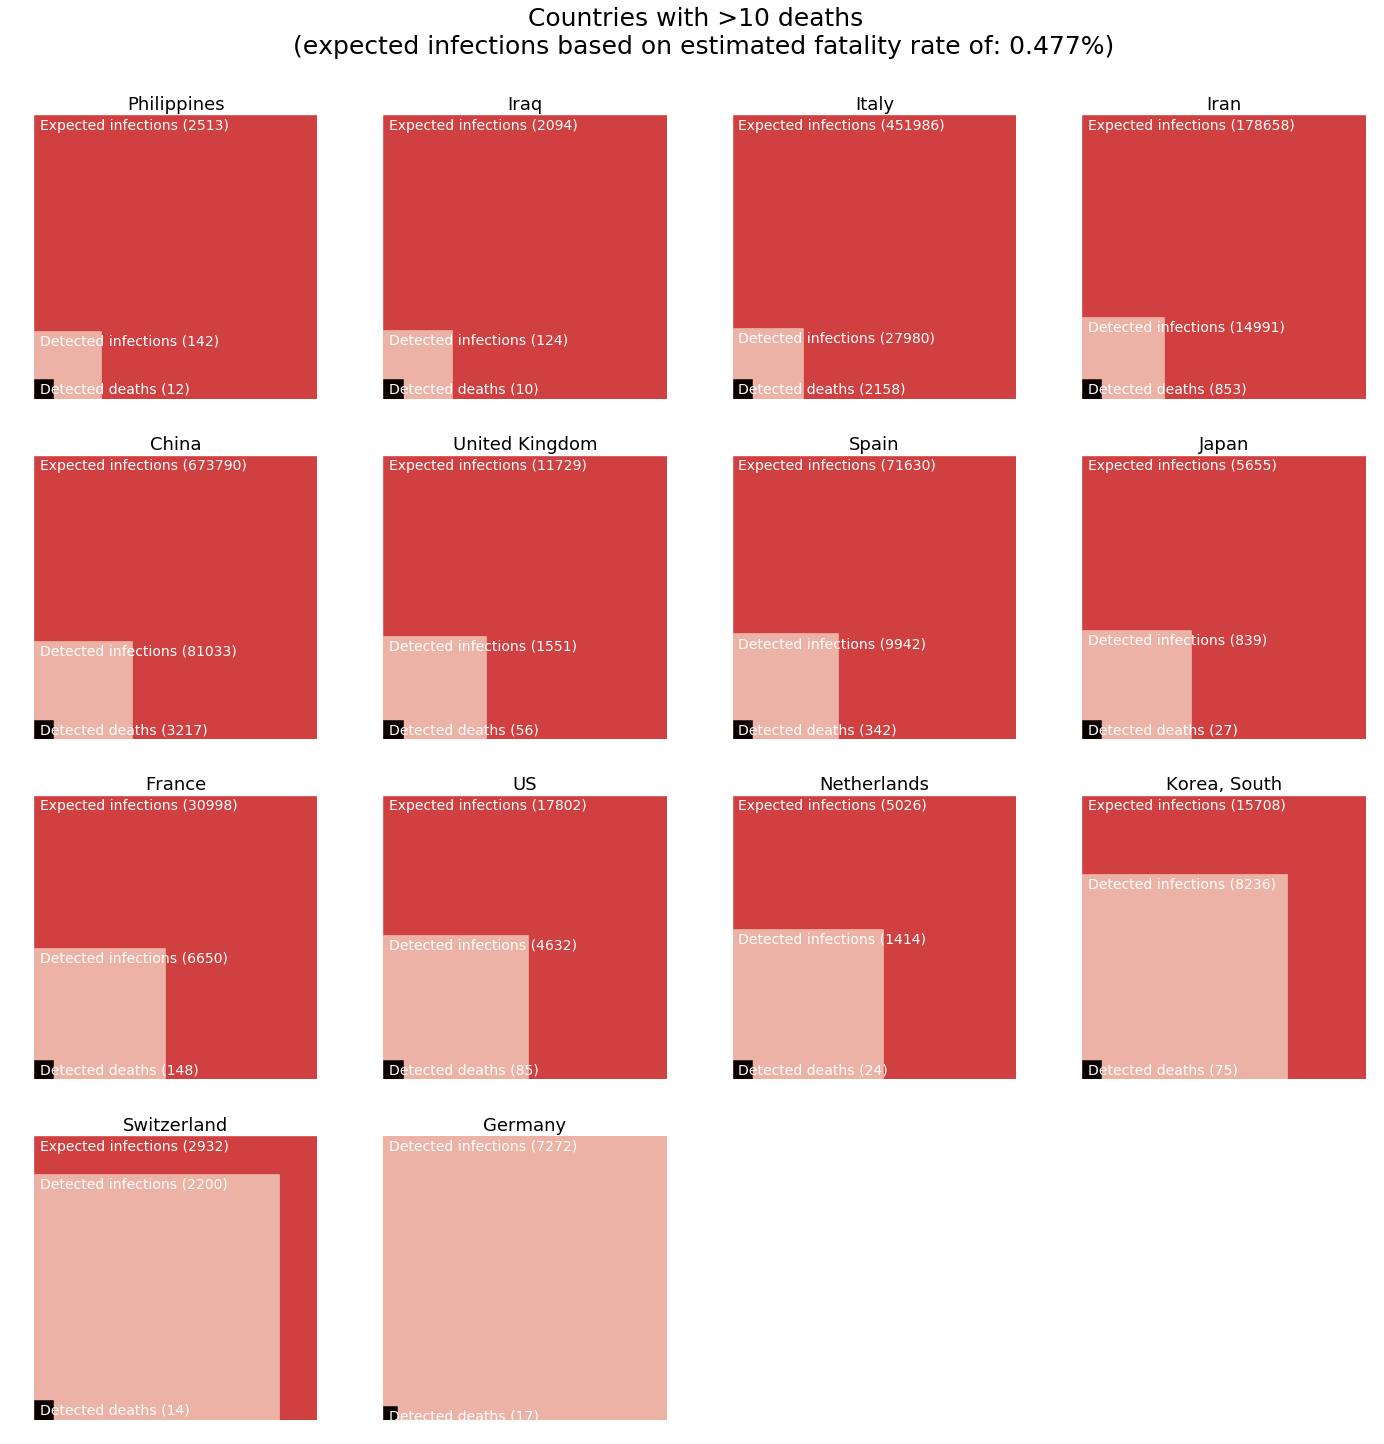

In [15]:
fatality_rate_estimate = estimated_rate_optimistic
fatal_rate_str = str(np.round(100*fatality_rate_estimate,3))
square_plot_array(data_deaths, 
                  data_deaths.index.tolist(), 
                  fatality_rate_estimate, 
                  n_x = 4, 
                  main_title="Countries with >10 deaths \n (expected infections based on estimated fatality rate of: "+fatal_rate_str+"%)",
                  filename = "expected_infections.pdf")